In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv('../news_aggregator_dataset/newsCorpora.csv', sep='\t', header=None, names=[
    'ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'
])

# Show basic information
df.head()


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


### Data Cleaning and Preprocessing
- Drop duplicates and missing values.
- Focus on essential columns: TITLE and CATEGORY.
- Visualize class distribution.

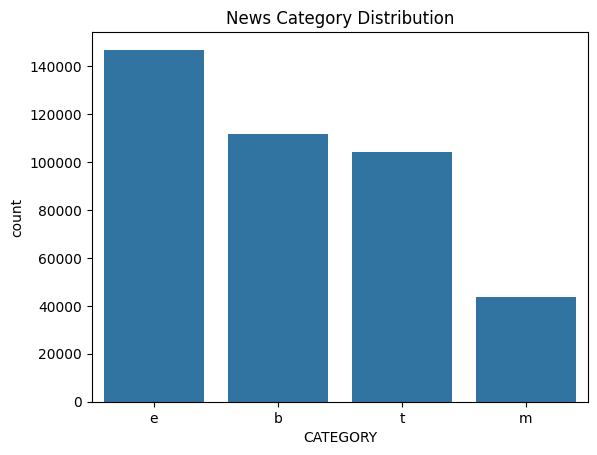

In [5]:
# Drop duplicates and missing values
df.drop_duplicates(subset=['TITLE'], inplace=True)
df.dropna(subset=['TITLE', 'CATEGORY'], inplace=True)

# Visualize the class distribution
sns.countplot(data=df, x='CATEGORY', order=df['CATEGORY'].value_counts().index)
plt.title("News Category Distribution")
plt.show()


In [ ]:
# I use small amount of data to save time and consuming less resources since i do a lot of experiment. 
# Sample 5% of data (3% for training, 2% for testing)
sample_df = df.sample(frac=0.05, random_state=42)

# Split data
train_df, test_df = train_test_split(sample_df, test_size=0.4, random_state=42)

print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")


Training samples: 12193
Testing samples: 8130


### Text Vectorization
We’ll convert text data into numerical format using TF-IDF vectorization.

In [7]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf.fit_transform(train_df['TITLE'])
X_test = tfidf.transform(test_df['TITLE'])

# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(train_df['CATEGORY'])
y_test = le.transform(test_df['CATEGORY'])


In [8]:
# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Classification Report:

              precision    recall  f1-score   support

           b       0.84      0.87      0.85      2235
           e       0.88      0.96      0.92      2907
           m       0.96      0.65      0.78       876
           t       0.86      0.83      0.85      2112

    accuracy                           0.87      8130
   macro avg       0.89      0.83      0.85      8130
weighted avg       0.87      0.87      0.87      8130



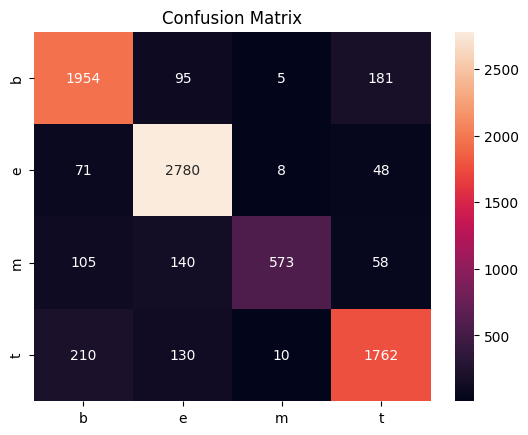

In [9]:
# Predictions and evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()
